/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

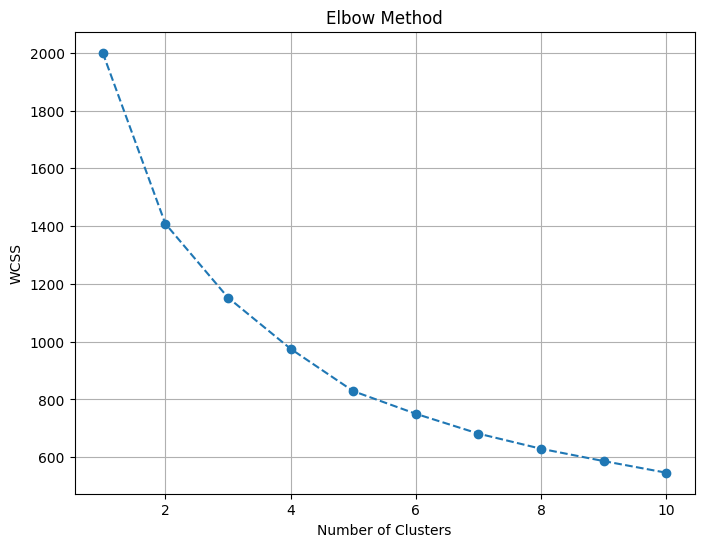

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


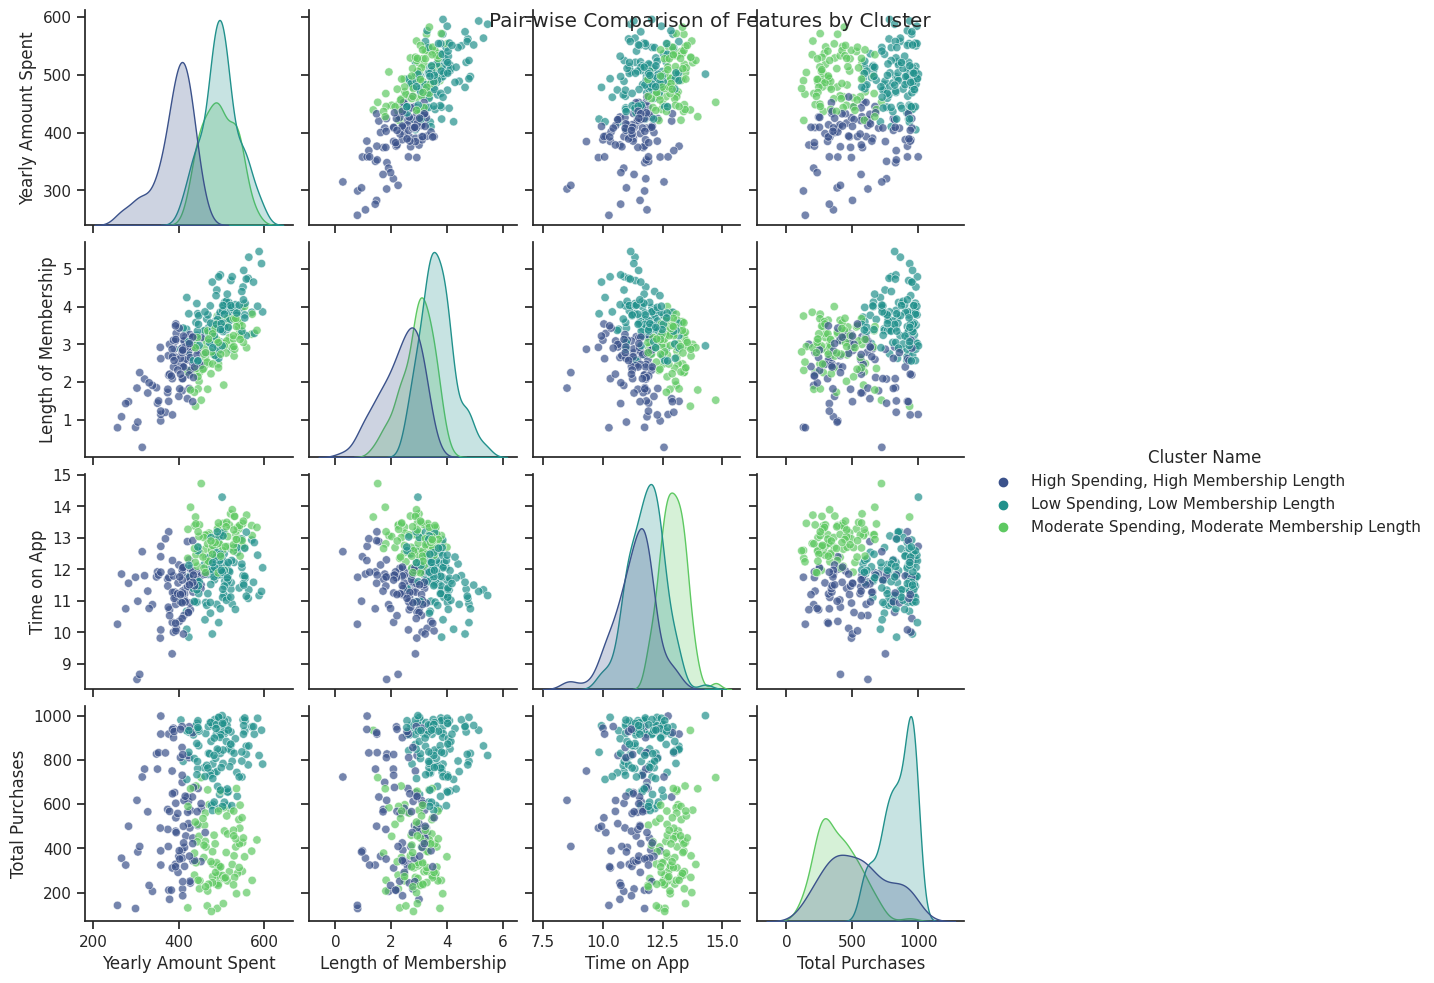

                                               Yearly Amount Spent  \
Cluster Name                                                         
High Spending, High Membership Length                   389.871170   
Low Spending, Low Membership Length                     497.319669   
Moderate Spending, Moderate Membership Length           494.438652   

                                               Length of Membership  \
Cluster Name                                                          
High Spending, High Membership Length                      2.337660   
Low Spending, Low Membership Length                        3.659669   
Moderate Spending, Moderate Membership Length              2.934045   

                                               Time on App  Total Purchases  
Cluster Name                                                                 
High Spending, High Membership Length            11.315957       541.891064  
Low Spending, Low Membership Length              11.810083 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the CSV file into a DataFrame
file_name = 'DV_CP.csv'
df = pd.read_csv(file_name)

# Select relevant columns for clustering (you can add more columns as needed)
selected_columns = ['Yearly Amount Spent', 'Length of Membership', 'Time on App', 'Total Purchases']
X = df[selected_columns]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow method
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

# Based on the Elbow method, choose an appropriate number of clusters (k)
k = 5 # You can adjust this value based on the plot

# Apply K-means clustering
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Mapping cluster labels to more descriptive names
cluster_names = {
    0: 'High Spending, High Membership Length',
    1: 'Moderate Spending, Moderate Membership Length',
    2: 'Low Spending, Low Membership Length'
}

df['Cluster Name'] = df['Cluster'].map(cluster_names)

# Pair-wise comparison of features colored by cluster
sns.set(style="ticks")
sns.pairplot(df, hue="Cluster Name", palette="viridis", vars=selected_columns, plot_kws={'alpha':0.7})
plt.suptitle('Pair-wise Comparison of Features by Cluster')
plt.show()

# Now, you can analyze and interpret the clusters with more descriptive names
cluster_means = df.groupby('Cluster Name')[selected_columns].mean()
print(cluster_means)

# Loop through the DataFrame and take actions based on cluster assignments
for index, row in df.iterrows():
    customer_id = row['Customer_id']
    cluster_name = row['Cluster Name']

    print(f"Customer {customer_id} belongs to {cluster_name}")
    # Add personalized marketing strategies based on cluster_name
    # Customize strategies for each descriptive cluster name.



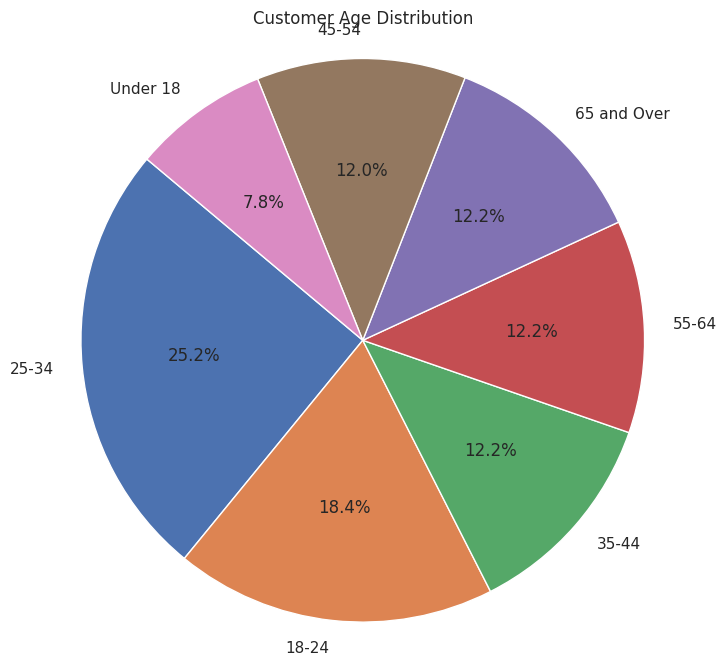

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
file_name = 'DV_CP.csv'
df = pd.read_csv(file_name)

age_categories = ['Under 18', '18-24', '25-34', '35-44', '45-54', '55-64', '65 and Over']
bins = [0, 18, 25, 35, 45, 55, 65, float('inf')]  # Define age bin edges

df['Age Category'] = pd.cut(df['Demographics'], bins=bins, labels=age_categories)

# Count the number of customers in each age category
age_counts = df['Age Category'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Customer Age Distribution')
plt.axis('equal')

# Show the pie chart
plt.show()


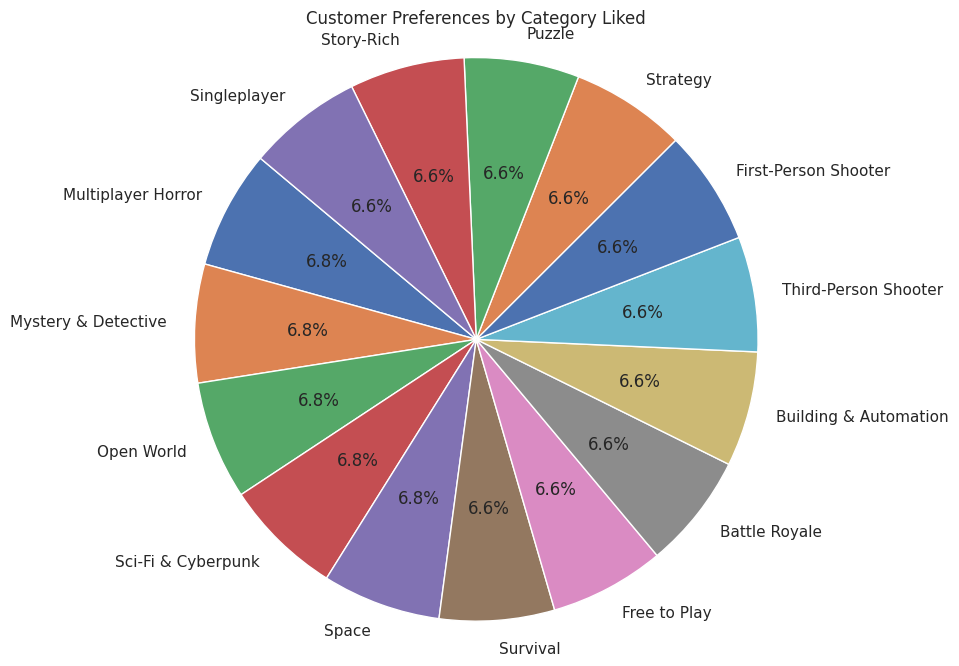

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
file_name = 'DV_CP.csv'
df = pd.read_csv(file_name)
category_counts = df['Category_Liked'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Customer Preferences by Category Liked')
plt.axis('equal')

# Show the pie chart
plt.show()


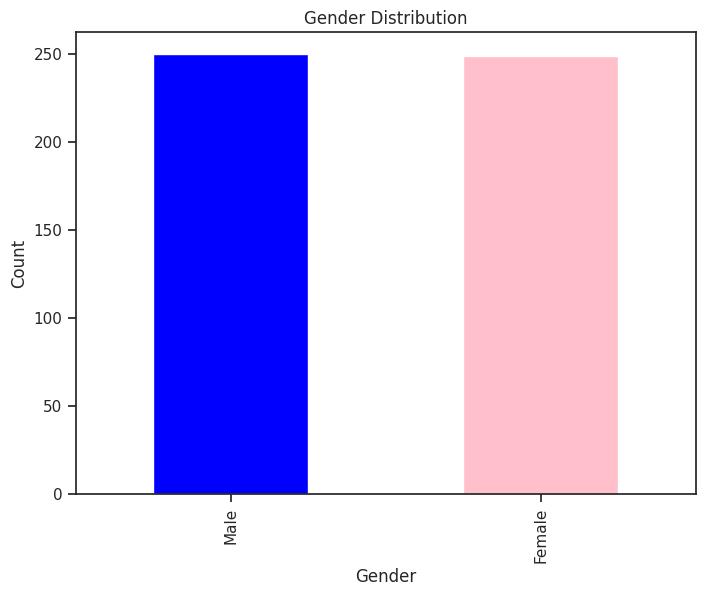

In [ ]:
gender_counts = df['Gender'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar', color=['blue', 'pink'])  # Adjust colors as needed
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.show()

In [ ]:
import pandas as pd
import folium
from geopy.geocoders import Nominatim

df = pd.read_csv('DV_CP.csv')
indian_cities = df['Location'].unique()
india_map = folium.Map(location=[20.5937, 78.9629], zoom_start=5)

geolocator = Nominatim(user_agent="indian_cities_locator")

# Iterate through Indian cities, add markers to the map
for city in indian_cities:
    try:
        location = geolocator.geocode(city + ", India")
        if location:
            folium.Marker(
                location=[location.latitude, location.longitude],
                popup=city,
            ).add_to(india_map)
    except Exception as e:
        print(f"Error locating {city}: {e}")

# Display the map
india_map.save('indian_cities_map.html')
india_map


In [ ]:
import pandas as pd
!pip install surprise
from surprise import Dataset, Reader, KNNBasic, accuracy
from surprise.model_selection import train_test_split
from collections import defaultdict

# Load data from your CSV files
user_data = pd.read_csv('DV_CP.csv')
game_data = pd.read_csv('DV_CP_GAMES.csv')

# Create a Surprise dataset
reader = Reader(rating_scale=(0, 5))
dataset = Dataset.load_from_df(user_data[['Customer_id', 'Category_Liked', 'Feedback/Ratings']], reader)

# Split data into train and test sets
trainset, testset = train_test_split(dataset, test_size=0.2, random_state=42)

# Build and train a KNNBasic collaborative filtering model
model = KNNBasic(sim_options={'user_based': True})
model.fit(trainset)

# Make predictions on the test set
predictions = model.test(testset)

# Evaluate the model
rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)

print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')

# Prompt the user for their Customer_id
user_id = input("Enter your Customer_id: ")

# Get the top N recommendations for the user
top_n = defaultdict(list)

for uid, iid, true_r, est, _ in predictions:
    top_n[uid].append((iid, est))

# Sort the recommendations by estimated rating
for uid, user_ratings in top_n.items():
    user_ratings.sort(key=lambda x: x[1], reverse=True)
    top_n[uid] = user_ratings[:5]  # Get the top 5 recommendations

# Extract the user's preferred category
user_preferences = user_data[user_data['Customer_id'] == int(user_id)]['Category_Liked'].values[0]

# Print the top N recommendations for the specified user
print(f'Top 5 Recommendations for User {user_id} based on their preference for {user_preferences}:')
for game_id, rating in top_n[user_id]:
    print(f'Recommended Game ID: {game_id}, Predicted Rating: {rating:.2f}')







     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3156239 sha256=f30c36e1fba12c45a0074aa977b07864541e8a7e71151567ce6893c11fcdeff8
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.6162
MAE:  0.4209
RMSE: 0.62
MAE: 0.42
Enter your Customer_id: 8148721
Top 5 Recommendations for User 8148721 based on their preference for First-Person Shooter:


In [ ]:
# Filter games in the same category from DV_CP_GAMES
category_games = game_data[game_data['Category_Liked'] == user_preferences]

# Check the user's Tier_Membership from DV_CP dataset
user_membership = user_data[user_data['Customer_id'] == int(user_id)]['Tier_Membership'].values[0]

# Print the games in the same category as the user's preference, along with user status and Premium games if applicable
print(f'Games Recommended for "{user_id}":')
for _, row in category_games.iterrows():
    game_name = row['Games']
    pre = row['Premium']
    med = row['Medium']
    free = row['Free Trial']
    reg = row['Regular']

    # Check if the user has Premium Tier_Membership in DV_CP
    if user_membership == 'Premium':
        premium_status = row['Premium']
        if user_id in premium_status:
            print(f'Game: {game_name} (Premium)')
            print(f'specially for you: {pre}')

    # Check if the user has Medium Tier_Membership in DV_CP
    elif user_membership == 'Medium':
        if med:
            print(f'Game: {game_name}')
            print(f'specially for you: {med}')

    # Check if the user has Regular Tier_Membership in DV_CP
    elif user_membership == 'Regular':
        if reg:
            print(f'Game: {game_name}')
            print(f'specially for you: {reg}')

    # Check if the user has Free Trial Tier_Membership in DV_CP
    elif user_membership == 'Free Trial':
        if free:
            print(f'Game: {game_name}')
            print(f'specially for you: {free}')

    # For other membership statuses (or if no matching status found), print the game without any special message
    else:
        print(f'Game: {game_name}')


Games Recommended for "8148721":
Game: Counter-Strike: Global Offensive", "Doom Eternal", "Call of Duty: Modern Warfare", "Halo: The Master Chief Collection", "Overwatch","Valorant"
specially for you: "Tom Clancy's Rainbow Six® Siege"


<ipython-input-10-742e85f9f76f>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[selected_feature] = le.fit_transform(X[selected_feature])
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' i

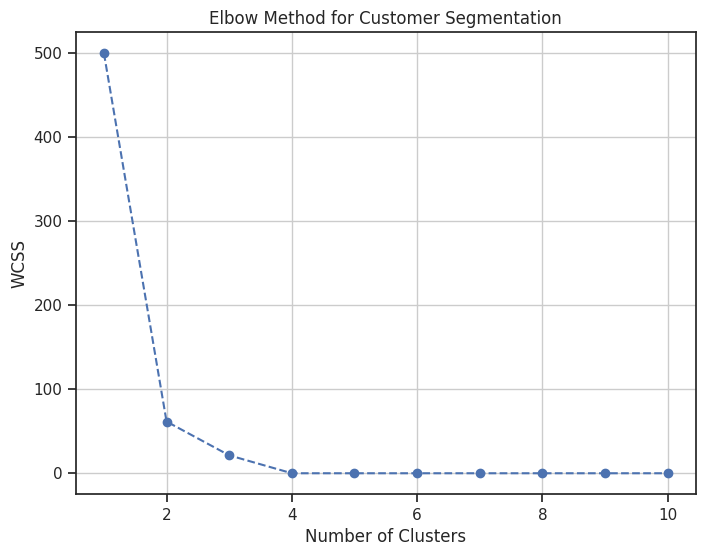

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


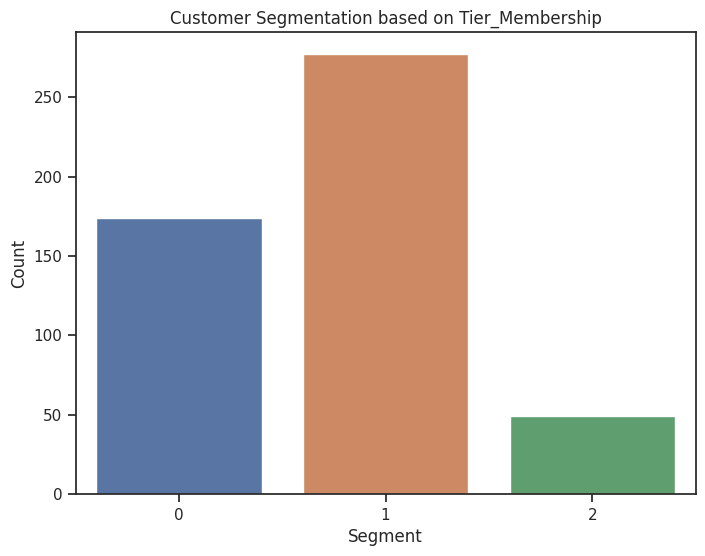

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Load the CSV file into a DataFrame
file_name = 'DV_CP.csv'
df = pd.read_csv(file_name)

# Select the feature for segmentation ('Tier_Membership' in this case)
selected_feature = 'Tier_Membership'

# Preprocess the data
X = df[[selected_feature]]

# Encode the 'Tier_Membership' column to numerical values
le = LabelEncoder()
X[selected_feature] = le.fit_transform(X[selected_feature])

# Standardize the data (necessary for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow method
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Customer Segmentation')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

# Based on the Elbow method, choose an appropriate number of clusters (k)
k = 3  # You can adjust this value based on the plot

# Apply K-Means clustering
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
df['Segment'] = kmeans.fit_predict(X_scaled)

# Visualize the customer segmentation using a countplot
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Segment')
plt.title('Customer Segmentation based on Tier_Membership')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.show()


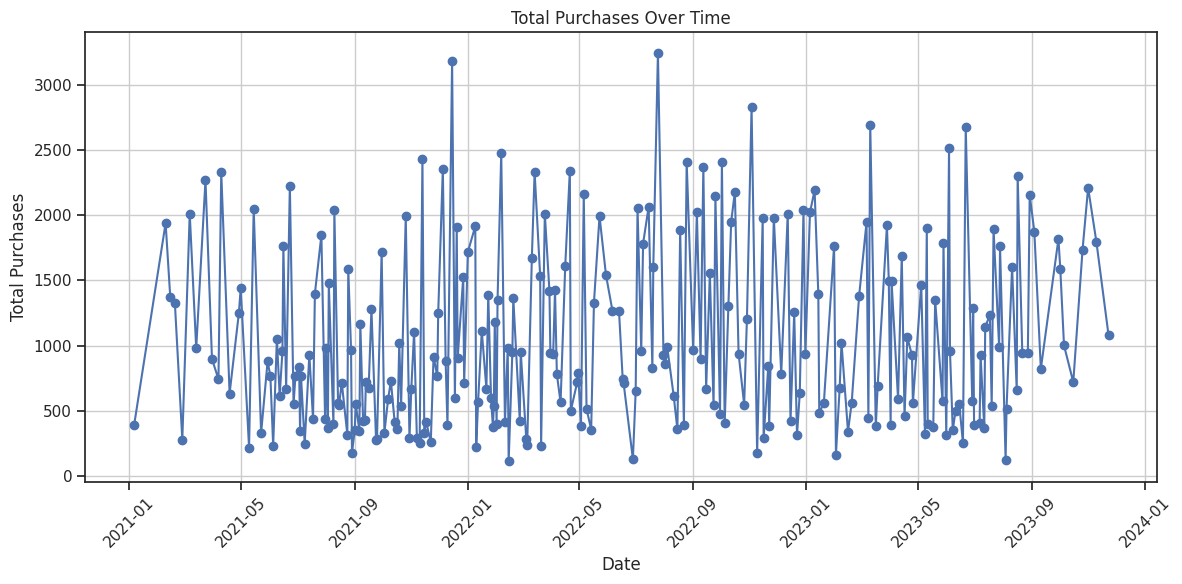

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
file_name = 'DV_CP.csv'
df = pd.read_csv(file_name)

df['Date'] = pd.to_datetime(df['Date'])

daily_purchases = df.groupby('Date')['Total Purchases'].sum().reset_index()


plt.figure(figsize=(12, 6))
plt.plot(daily_purchases['Date'], daily_purchases['Total Purchases'], marker='o', linestyle='-', color='b')
plt.title('Total Purchases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Purchases')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
import pandas as pd
file_name = 'DV_CP.csv'
df = pd.read_csv(file_name)

df['Date'] = pd.to_datetime(df['Date'])

# Find the oldest and newest members based on the 'Date' column
oldest_member = df['Date'].min()
newest_member = df['Date'].max()

most_spent_customer = df.loc[df['Total Purchases'].idxmax()]
least_spent_customer = df.loc[df['Total Purchases'].idxmin()]

average_spending = df['Total Purchases'].mean()

# Display the results
print(f'Oldest Member Joined on: {oldest_member}')
print(f'Newest Member Joined on: {newest_member}')
print(f'Most Spent Customer:\n{most_spent_customer}')
print(f'Least Spent Customer:\n{least_spent_customer}')
print(f'Average Spending: {average_spending:.2f}')


Oldest Member Joined on: 2021-01-06 00:00:00
Newest Member Joined on: 2023-11-23 00:00:00
Most Spent Customer:
        Email                                     vancealicia@hotmail.com
Address                 06307 Scott Spurs Suite 161Jessicaburgh, NH 26...
Avatar                                                          RoyalBlue
Time on App                                                         14.29
Time on Website                                                     36.77
Length of Membership                                                 2.96
Yearly Amount Spent                                                501.12
Total Purchases                                                    999.46
Discounts                                                            0.12
Customer_id                                                       7923846
Date                                                  2023-06-04 00:00:00
Tier_Membership                                                    Medium
T

In [ ]:
import pandas as pd

file_name = 'DV_CP.csv'
df = pd.read_csv(file_name)


df['Date'] = pd.to_datetime(df['Date'])

current_date = pd.to_datetime('2023-09-29')
df['Tenure'] = (current_date - df['Date']).dt.days  # Tenure in days


tenure_bins = [0, 365, 1095, float('inf')]  # Define tenure groups in days
tenure_labels = ['Less than 1 year', '1-3 years', 'More than 3 years']
df['Tenure Group'] = pd.cut(df['Tenure'], bins=tenure_bins, labels=tenure_labels)


print(df[['Customer_id', 'Date', 'Tenure', 'Tenure Group']])


     Customer_id       Date  Tenure      Tenure Group
0        1312378 2021-08-15     775         1-3 years
1        2318467 2021-05-23     859         1-3 years
2        3498756 2021-10-07     722         1-3 years
3        4823691 2023-03-19     194  Less than 1 year
4        5951832 2022-09-30     364  Less than 1 year
..           ...        ...     ...               ...
495      8388742 2021-10-10     719         1-3 years
496      9298742 2022-07-03     453         1-3 years
497      1048894 2021-06-15     836         1-3 years
498      1248894 2022-01-29     608         1-3 years
499      1708894 2023-06-01     120  Less than 1 year

[500 rows x 4 columns]


In [ ]:
import pandas as pd
file_name = 'DV_CP.csv'
df = pd.read_csv(file_name)
df['Date of Joining'] = pd.to_datetime(df['Date'])

current_date = pd.to_datetime('2023-09-29')
df['Customer Lifespan'] = (current_date - df['Date of Joining']).dt.days


df['Total Purchase'] = df['Yearly Amount Spent'] + df['Total Purchases']

weight_lifespan = 0.6
weight_total_purchase = 0.4

df['Combined Score'] = (weight_lifespan * df['Customer Lifespan']) + (weight_total_purchase * df['Total Purchase'])

df = df.sort_values(by='Combined Score', ascending=False)
top_10_customers = df.head(10)
print(top_10_customers[['Customer_id', 'Customer Lifespan', 'Total Purchase', 'Combined Score']])


     Customer_id  Customer Lifespan  Total Purchase  Combined Score
347      4738742                902         1526.90        1151.960
30       5139274                929         1475.82        1147.728
46       2657481                912         1491.45        1143.780
131      8396283                902         1497.59        1140.236
126      1577693                962         1366.14        1123.656
234      2374938                962         1334.74        1111.096
139      7885687                919         1394.12        1109.048
497      1048894                836         1506.75        1104.300
271      8532769                801         1512.44        1085.576
468      8098742                807         1483.16        1077.464


In [ ]:
import pandas as pd

file_name = 'DV_CP.csv'
df = pd.read_csv(file_name)
category_feedback = df.groupby('Category_Liked')['Feedback/Ratings'].mean().reset_index()
category_feedback = category_feedback.sort_values(by='Feedback/Ratings', ascending=False)
print("Ranking of Categories by Average Rating:")
for rank, row in enumerate(category_feedback.iterrows(), start=1):
    category = row[1]['Category_Liked']
    avg_rating = row[1]['Feedback/Ratings']
    print(f"Rank {rank}: {category} (Average Rating: {avg_rating:.2f})")


Ranking of Categories by Average Rating:
Rank 1: Free to Play (Average Rating: 4.57)
Rank 2: Mystery & Detective (Average Rating: 4.54)
Rank 3: Building & Automation (Average Rating: 4.45)
Rank 4: Space (Average Rating: 4.39)
Rank 5: Third-Person Shooter (Average Rating: 4.36)
Rank 6: Story-Rich (Average Rating: 4.27)
Rank 7: Strategy (Average Rating: 4.25)
Rank 8: Sci-Fi & Cyberpunk (Average Rating: 4.12)
Rank 9: Multiplayer Horror (Average Rating: 4.10)
Rank 10: Singleplayer (Average Rating: 4.10)
Rank 11: Puzzle (Average Rating: 4.04)
Rank 12: First-Person Shooter (Average Rating: 3.99)
Rank 13: Open World (Average Rating: 3.96)
Rank 14: Battle Royale (Average Rating: 3.80)
Rank 15: Survival (Average Rating: 3.75)


In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
file_name = 'DV_CP.csv'
df = pd.read_csv(file_name)

weight_total_purchases = 0.2
weight_time_on_app = 0.15
weight_time_on_website = 0.1
weight_length_of_membership = 0.2
weight_yearly_amount_spent = 0.25
weight_discount = -0.1

df['Combined Score'] = (
    weight_total_purchases * df['Total Purchases'] +
    weight_time_on_app * df['Time on App'] +
    weight_time_on_website * df['Time on Website'] +
    weight_length_of_membership * df['Length of Membership'] +
    weight_yearly_amount_spent * df['Yearly Amount Spent'] +
    weight_discount * df['Discounts']
)
location_scores = df.groupby('Location')['Combined Score'].mean().reset_index()

location_scores = location_scores.sort_values(by='Combined Score', ascending=False)
top_10_locations = location_scores.head(10)


print("Top 10 Locations Based on Combined Score (including Discount as negative factor):")
print(top_10_locations)


Top 10 Locations Based on Combined Score (including Discount as negative factor):
       Location  Combined Score
18     Bhiwandi        359.9750
69        Noida        339.8225
74  Rajahmundry        335.0890
91   Vijayawada        331.4750
71      Patiala        330.7090
4       Aligarh        327.8335
2      Akbarpur        324.7330
16    Bhavnagar        316.2490
12     Belagavi        312.5785
85  Tirunelveli        310.6270


In [ ]:
import pandas as pd

#
file_name = 'DV_CP.csv'
df = pd.read_csv(file_name)

# Create age groups (18-29, 30-39, 40+)
bins = [18, 30, 40, 100]
labels = ['18-29', '30-39', '40+']
df['Age Group'] = pd.cut(df['Demographics'], bins=bins, labels=labels, right=False)

# Group the data by 'Age Group' and 'Category_Liked' and calculate the total money spent and count of customers
category_age_group = df.groupby(['Age Group', 'Category_Liked'])[['Yearly Amount Spent']].mean().reset_index()
category_gender = df.groupby(['Age Group', 'Category_Liked', 'Gender'])[['Customer_id']].count().reset_index()

# Find the most liked category and average total money spent for each age group
most_liked_categories = {}
average_money_spent = {}
gender_distribution = {}

for age_group in labels:
    age_group_data = category_age_group[category_age_group['Age Group'] == age_group]

    # Find the most liked category for the age group
    most_liked_category = age_group_data.loc[age_group_data['Yearly Amount Spent'].idxmax()]['Category_Liked']
    most_liked_categories[age_group] = most_liked_category

    # Calculate the average total money spent for the age group
    avg_money_spent = age_group_data['Yearly Amount Spent'].mean()
    average_money_spent[age_group] = avg_money_spent


# Print the results
for age_group in labels:
    print(f"Age Group: {age_group}")
    print(f"Most Liked Category: {most_liked_categories[age_group]}")
    print(f"Average Total Money Spent: ${average_money_spent[age_group]:.2f}")

    print("\n")


Age Group: 18-29
Most Liked Category: Survival
Average Total Money Spent: $502.89


Age Group: 30-39
Most Liked Category: First-Person Shooter
Average Total Money Spent: $486.65


Age Group: 40+
Most Liked Category: Mystery & Detective
Average Total Money Spent: $500.02




In [ ]:
import pandas as pd
file_name = 'DV_CP.csv'
df = pd.read_csv(file_name)
category_gender = df.groupby(['Gender', 'Category_Liked'])[['Customer_id']].count().reset_index()

def top_categories_by_gender(gender):
    gender_data = category_gender[category_gender['Gender'] == gender]
    top_categories = gender_data.sort_values(by='Customer_id', ascending=False).head(5)
    return top_categories

top_categories_men = top_categories_by_gender('Male')

top_categories_women = top_categories_by_gender('Female')
print("Top 5 Categories Liked by Men:")
print(top_categories_men)

print("\nTop 5 Categories Liked by Women:")
print(top_categories_women)


Top 5 Categories Liked by Men:
   Gender        Category_Liked  Customer_id
19   Male    Multiplayer Horror           18
21   Male            Open World           18
15   Male         Battle Royale           17
17   Male  First-Person Shooter           17
22   Male                Puzzle           17

Top 5 Categories Liked by Women:
    Gender         Category_Liked  Customer_id
5   Female    Mystery & Detective           18
8   Female     Sci-Fi & Cyberpunk           18
1   Female  Building & Automation           17
3   Female           Free to Play           17
10  Female                  Space           17


In [ ]:
import pandas as pd

file_name = 'DV_CP.csv'
df = pd.read_csv(file_name)

kalyan_customers = df[df['Location'] == 'Pune']

category_liked_counts = kalyan_customers['Category_Liked'].value_counts().reset_index()
category_liked_counts.columns = ['Category_Liked', 'Count']

print("Categories Liked by People from Kalyan:")
print(category_liked_counts)


Categories Liked by People from Kalyan:
         Category_Liked  Count
0              Survival     13
1  First-Person Shooter     13
2    Multiplayer Horror     12
3          Singleplayer      9
4                 Space      7
5  Third-Person Shooter      7
6          Free to Play      6
7              Strategy      6
8   Mystery & Detective      4
9            Open World      1


In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
file_name = 'DV_CP.csv'
df = pd.read_csv(file_name)

# Define a function to calculate loyalty score for a customer
def calculate_loyalty_score(row):
    # You can customize this formula based on your preferences
    loyalty_score = (
        row['Time on App'] +
        row['Time on Website'] +
        row['Length of Membership'] +
        row['Yearly Amount Spent'] +
        row['Total Purchases'] +
        row['Feedback/Ratings']
    )
    return loyalty_score

# Calculate the loyalty score for each customer
df['Loyalty Score'] = df.apply(calculate_loyalty_score, axis=1)

# Find the customer with the highest loyalty score
most_loyal_customer = df[df['Loyalty Score'] == df['Loyalty Score'].max()]

# Extract and print the customer ID, location, age, and category_liked of the most loyal customer
customer_id = most_loyal_customer['Customer_id'].values[0]
location = most_loyal_customer['Location'].values[0]
age = most_loyal_customer['Demographics'].values[0]
category_liked = most_loyal_customer['Category_Liked'].values[0]

print(f"Most Loyal Customer Information:")
print(f"Customer ID: {customer_id}")
print(f"Location: {location}")
print(f"Age: {age}")
print(f"Category Liked: {category_liked}")


Most Loyal Customer Information:
Customer ID: 4347892
Location: Chennai
Age: 21
Category Liked: Survival


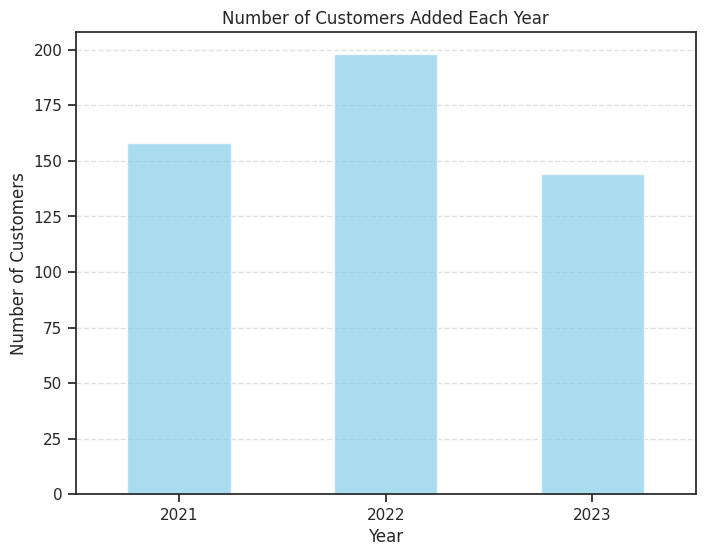

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
file_name = 'DV_CP.csv'
df = pd.read_csv(file_name)

df['Year'] = pd.to_datetime(df['Date']).dt.year

# Count the number of customers added in each year
customer_count_by_year = df['Year'].value_counts().sort_index()

# Create a bar graph
plt.figure(figsize=(8, 6))
customer_count_by_year.plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Number of Customers Added Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Show the plot
plt.show()


In [ ]:
import pandas as pd
dv_cp_data = pd.read_csv('DV_CP.csv')
dv_cp_games_data = pd.read_csv('DV_CP_GAMES.csv')
customer_id_to_check = input("Enter your Customer ID: ")
game_name = input("Enter the game name: ")
customer_id_to_check = int(customer_id_to_check)
if customer_id_to_check in dv_cp_data['Customer_id'].values:
    customer_info = dv_cp_data[dv_cp_data['Customer_id'] == customer_id_to_check]
    category_liked = customer_info['Category_Liked'].values[0]
    tier_membership = customer_info['Tier_Membership'].values[0]
    games_column = dv_cp_games_data.loc[dv_cp_games_data['Category_Liked'] == category_liked, 'Games'].values[0]
    user_membership_column = dv_cp_games_data.loc[dv_cp_games_data['Category_Liked'] == category_liked, tier_membership].values[0]

    if game_name in games_column or game_name in user_membership_column:
        print(f"You should definitely try {game_name}!")
    else:
        print(f"'{game_name}' is not recommended for the '{category_liked}' category or your membership tier.")
else:
    print(f"Customer with ID {customer_id_to_check} not found in the dataset.")
print(f"Other games to try for free are {games_column} , {user_membership_column}")


Enter your Customer ID: 6743820
Enter the game name: Factorio
You should definitely try Factorio!
Other games to try for free are Factorio, Satisfactory, Cities: Skylines, Oxygen Not Included, RimWorld , Cities: Skylines II


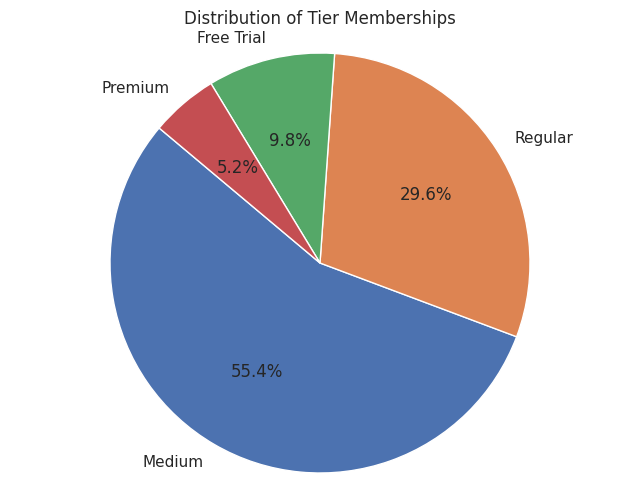

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

dv_cp_data = pd.read_csv('DV_CP.csv')

# Count the number of customers in each tier membership category
tier_counts = dv_cp_data['Tier_Membership'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(tier_counts, labels=tier_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Tier Memberships')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()
